In [ ]:
import requests

url_1 = "https://ghoapi.azureedge.net/api/NCD_BMI_30C"
url_2 = "https://ghoapi.azureedge.net/api/NCD_BMI_PLUS2C"
url_3 = "https://ghoapi.azureedge.net/api/NCD_BMI_18C"
url_4 = "https://ghoapi.azureedge.net/api/NCD_BMI_MINUS2C"
            

In [ ]:
import pandas as pd
response = requests.get(url_1)   
data = response.json() 
df = pd.DataFrame(data['value'])
df['age_group'] = 'adult'

response2 = requests.get(url_2) 
data2 = response2.json() 
df2 = pd.DataFrame(data2['value'])
df2['age_group'] = 'child'

response3 = requests.get(url_3) 
data3 = response3.json() 
df3 = pd.DataFrame(data3['value'])
df3['age_group'] = 'adult'

response4 = requests.get(url_4) 
data4 = response4.json() 
df4 = pd.DataFrame(data4['value'])
df4['age_group'] = 'child'


In [ ]:
# combine 2 dataset into one dataframe
combined_df = pd.concat([df, df2], ignore_index=True)
print(combined_df)

# combine 2 dataset into one dataframe for df_malnutrition
combined_df_malnutrition = pd.concat([df3, df4], ignore_index=True)
print(combined_df_malnutrition)

combined_df.name = "df_obesity"
combined_df_malnutrition.name = "df_malnutrition"

In [141]:
combined_df_malnutrition.head()

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,ParentLocationCode,ParentLocation,Dim1Type,Dim1,TimeDim,...,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd,age_group
0,6646408,NCD_BMI_18C,COUNTRY,MKD,YEAR,EUR,Europe,SEX,SEX_BTSX,1992,...,2.8 [1.6-4.5],2.76173,1.56470,4.47058,None,2024-02-29T16:06:41.017+01:00,1992,1992-01-01T00:00:00+01:00,1992-12-31T00:00:00+01:00,adult
1,53,NCD_BMI_18C,COUNTRY,GAB,YEAR,AFR,Africa,SEX,SEX_FMLE,2021,...,5.8 [4.0-8.1],5.79511,3.97204,8.07702,None,2024-02-29T16:06:41.017+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00,adult
2,404,NCD_BMI_18C,COUNTRY,TUV,YEAR,WPR,Western Pacific,SEX,SEX_BTSX,2001,...,0.9 [0.4-1.9],0.93657,0.36515,1.85929,None,2024-02-29T16:06:41.017+01:00,2001,2001-01-01T00:00:00+01:00,2001-12-31T00:00:00+01:00,adult
3,1623,NCD_BMI_18C,COUNTRY,GHA,YEAR,AFR,Africa,SEX,SEX_MLE,2002,...,13.2 [10.0-16.7],13.20428,10.04854,16.71203,None,2024-02-29T16:06:41.017+01:00,2002,2002-01-01T00:00:00+01:00,2002-12-31T00:00:00+01:00,adult
4,1993,NCD_BMI_18C,COUNTRY,TCD,YEAR,AFR,Africa,SEX,SEX_BTSX,1990,...,23.2 [17.8-29.0],23.20135,17.80808,28.99020,None,2024-02-29T16:06:41.017+01:00,1990,1990-01-01T00:00:00+01:00,1990-12-31T00:00:00+01:00,adult


In [ ]:
filtered_combined_df = combined_df[(combined_df['TimeDim'] >= 2012) & (combined_df['TimeDim'] <= 2022)]
filtered_combined_df_malnutrition = combined_df_malnutrition[(combined_df_malnutrition['TimeDim'] >= 2012) & (combined_df_malnutrition['TimeDim'] <= 2022)]

In [ ]:
#columns to keep in datasets
columns_to_keep = [
    "ParentLocation",
    "Dim1",
    "TimeDim",
    "Low",
    "High",
    "NumericValue",
    "SpatialDim",
    "age_group"
]

df1_columns = filtered_combined_df[columns_to_keep]
df2_columns = filtered_combined_df_malnutrition[columns_to_keep]

In [ ]:
# Rename columns
df1_columns.rename(columns={
    "TimeDim": "Year",
    "Dim1": "Gender",
    "NumericValue": "Mean_Estimate",
    "Low": "LowerBound",
    "High": "UpperBound",
    "ParentLocation": "Region",
    "SpatialDim": "Country",
    "age_group": "Age_Group"
}, inplace=True)

df2_columns.rename(columns={
    "TimeDim": "Year",
    "Dim1": "Gender",
    "NumericValue": "Mean_Estimate",
    "Low": "LowerBound",
    "High": "UpperBound",
    "ParentLocation": "Region",
    "SpatialDim": "Country",
    "age_group": "Age_Group"
}, inplace=True)

In [ ]:
# Standardize Gender values
def standardize_gender(val):
    val = str(val).strip().upper()
    if val == 'SEX_MLE':
        return 'Male'
    elif val == 'SEX_FMLE':
        return 'Female'
    else: 
        return 'Both'
   
df1_columns = df1_columns.copy()
df2_columns = df2_columns.copy()

df1_columns['Gender'] = df1_columns['Gender'].apply(standardize_gender)
df2_columns['Gender'] = df2_columns['Gender'].apply(standardize_gender)

In [ ]:
!pip install pycountry

In [ ]:
import pycountry
special_cases = {
                    'GLOBAL': 'Global',
                    'WB_LMI': 'Low & Middle Income',
                    'WB_HI': 'High Income',
                    'WB_LI': 'Low Income',
                    'EMR': 'Eastern Mediterranean Region',
                    'EUR': 'Europe',
                    'AFR': 'Africa',
                    'SEAR': 'South-East Asia Region',
                    'WPR': 'Western Pacific Region',
                    'AMR': 'Americas Region',
                    'WB_UMI': 'Upper Middle Income'}

def convert_country_code(code):
    try:
        # First check if it's a known special case
        if code in special_cases:
            return special_cases[code]
        
        # Otherwise, try to get the official country name from ISO Alpha-3
        country = pycountry.countries.get(alpha_3=code)
        return country.name if country else "Unknown"
    except:
        return "Unknown"

df1_columns['Country'] = df1_columns['Country'].apply(convert_country_code)
df2_columns['Country'] = df2_columns['Country'].apply(convert_country_code)

In [ ]:
#new column CI_Width
df1_columns['CI_Width'] = df1_columns['UpperBound'] - df1_columns['LowerBound']
df2_columns['CI_Width'] = df2_columns['UpperBound'] - df2_columns['LowerBound']

In [ ]:
# for obesity dataframe
def categorize_obesity(value):
    if value >= 30:
        return 'High'
    elif 25 <= value < 30:
        return 'Moderate'
    elif value < 25:
        return 'Low'
    else:
        return 'Unknown'

df1_columns['obesity_level'] = df1_columns['Mean_Estimate'].apply(categorize_obesity)

In [ ]:
#for malnutrition dataframe
def categorize_malnutrition(value):
    if value >= 20:
        return 'High'
    elif 10 <= value < 20:
        return 'Moderate'
    elif value < 10:
        return 'Low'
    else:
        return 'Unknown'

df2_columns['malnutrition_level'] = df2_columns['Mean_Estimate'].apply(categorize_malnutrition)

In [147]:
df2_columns.shape

(27720, 10)

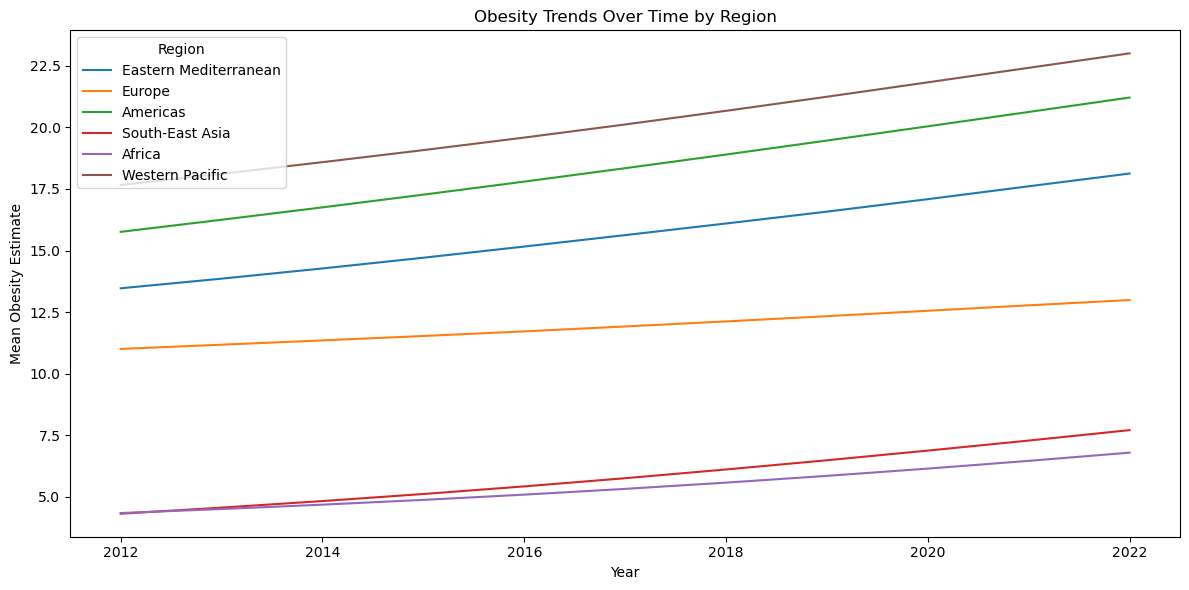

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

# Average obesity trend over time by region
plt.figure(figsize=(12, 6))
sns.lineplot(data=df1_columns, x='Year', y='Mean_Estimate', hue='Region', errorbar=None)
plt.title('Obesity Trends Over Time by Region')
plt.ylabel('Mean Obesity Estimate')
plt.xlabel('Year')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

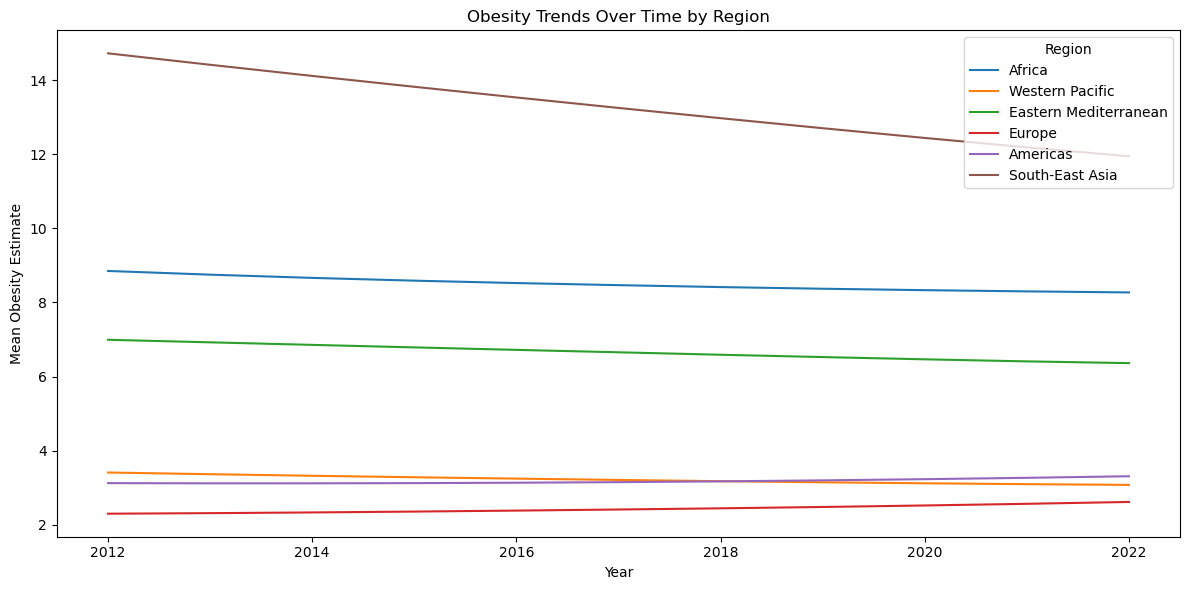

In [155]:
# Average Malnutrition trend over time by region
plt.figure(figsize=(12, 6))
sns.lineplot(data=df2_columns, x='Year', y='Mean_Estimate', hue='Region', errorbar=None)
plt.title('Malnutrition Trends Over Time by Region')
plt.ylabel('Mean Malnutrition Estimate')
plt.xlabel('Year')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

Bar charts to compare top/bottom countries or regions

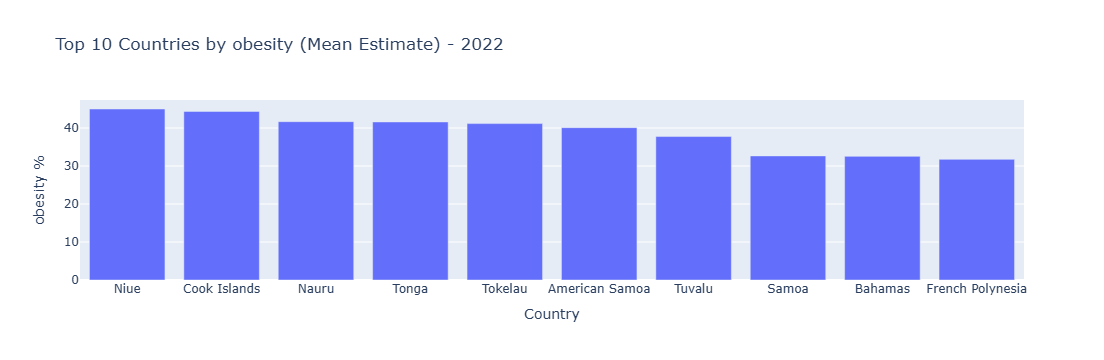

In [163]:
import plotly.express as px

# Top 10 countries by latest year obesity mean
latest_year = df1_columns['Year'].max()
top_countries = df1_columns[df1_columns['Year'] == latest_year] \
                    .groupby('Country')['Mean_Estimate'] \
                    .mean().nlargest(10).reset_index()

fig = px.bar(top_countries, x='Country', y='Mean_Estimate',
             title=f'Top 10 Countries by obesity (Mean Estimate) - {latest_year}',
             labels={'Mean_Estimate': 'obesity %'})
fig.show()

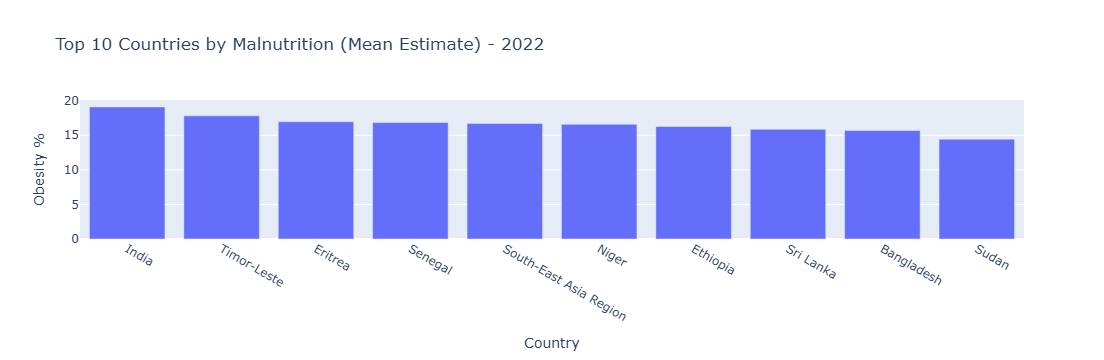

In [161]:
import plotly.express as px

# Top 10 countries by latest year malnutrition mean
latest_year = df2_columns['Year'].max()
top_countries = df2_columns[df2_columns['Year'] == latest_year] \
                    .groupby('Country')['Mean_Estimate'] \
                    .mean().nlargest(10).reset_index()

fig = px.bar(top_countries, x='Country', y='Mean_Estimate',
             title=f'Top 10 Countries by Malnutrition (Mean Estimate) - {latest_year}',
             labels={'Mean_Estimate': 'malnutrition %'})
fig.show()

Box plots to observe variability by region

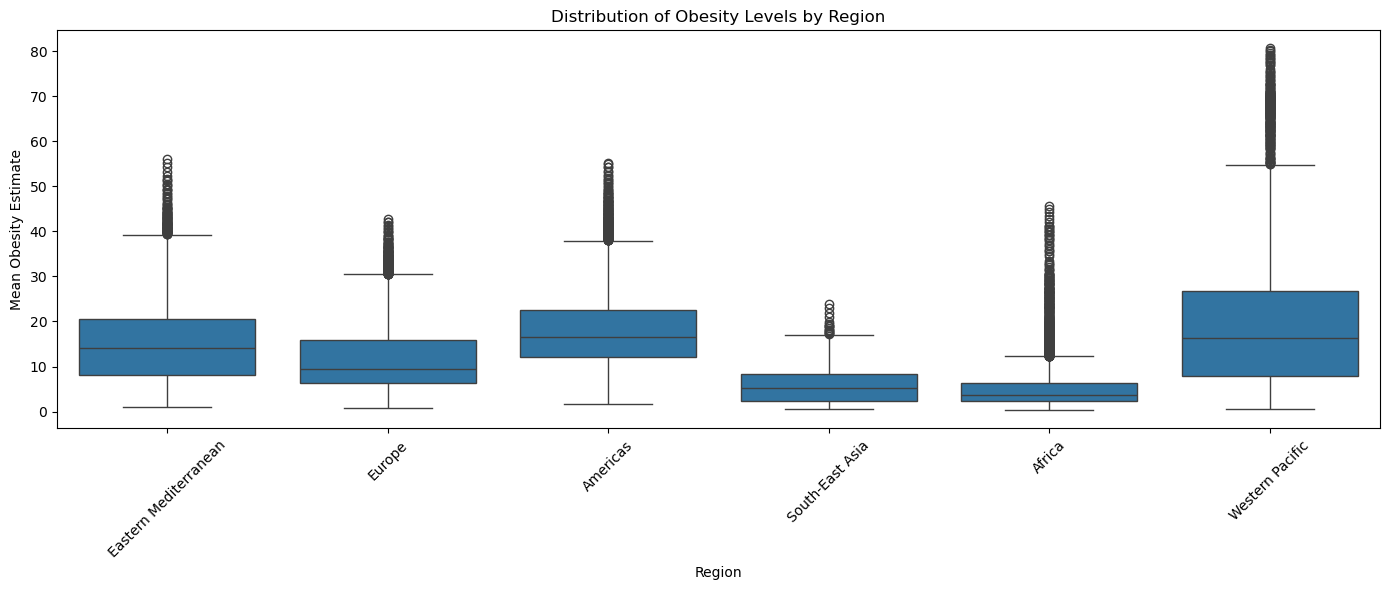

In [165]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df1_columns, x='Region', y='Mean_Estimate')
plt.title('Distribution of Obesity Levels by Region')
plt.xticks(rotation=45)
plt.ylabel('Mean Obesity Estimate')
plt.tight_layout()
plt.show()


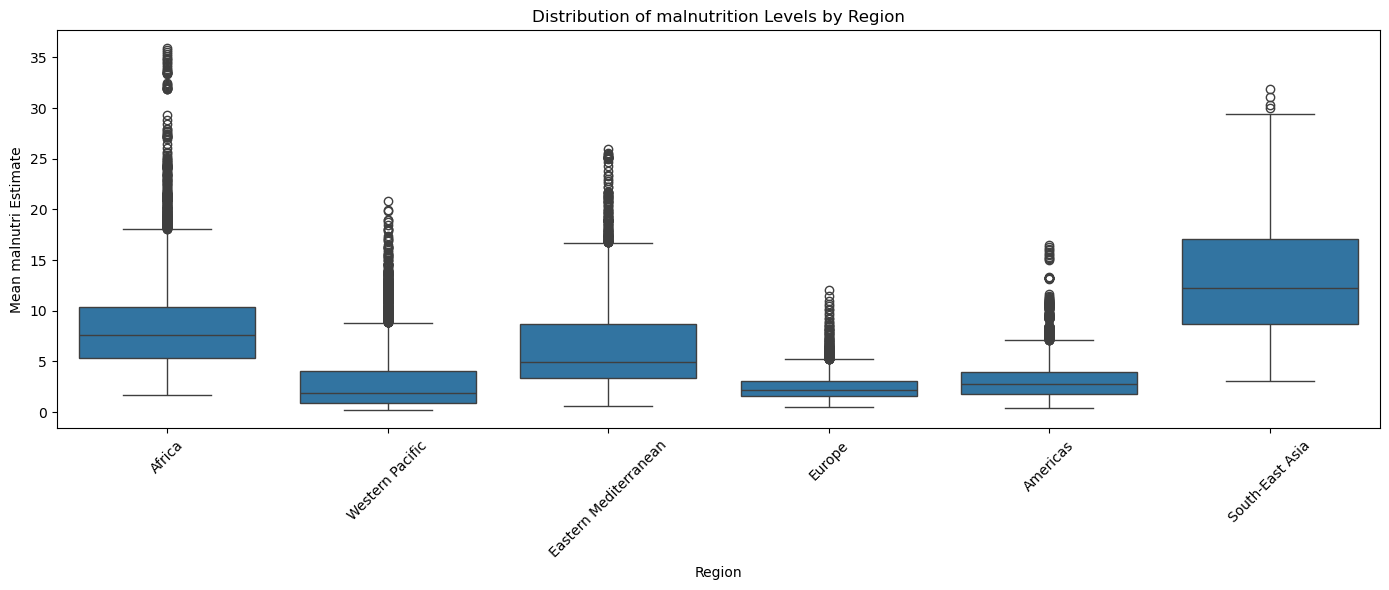

In [167]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df2_columns, x='Region', y='Mean_Estimate')
plt.title('Distribution of malnutrition Levels by Region')
plt.xticks(rotation=45)
plt.ylabel('Mean malnutri Estimate')
plt.tight_layout()
plt.show()


Heatmaps or scatter plots to identify patterns and outliers


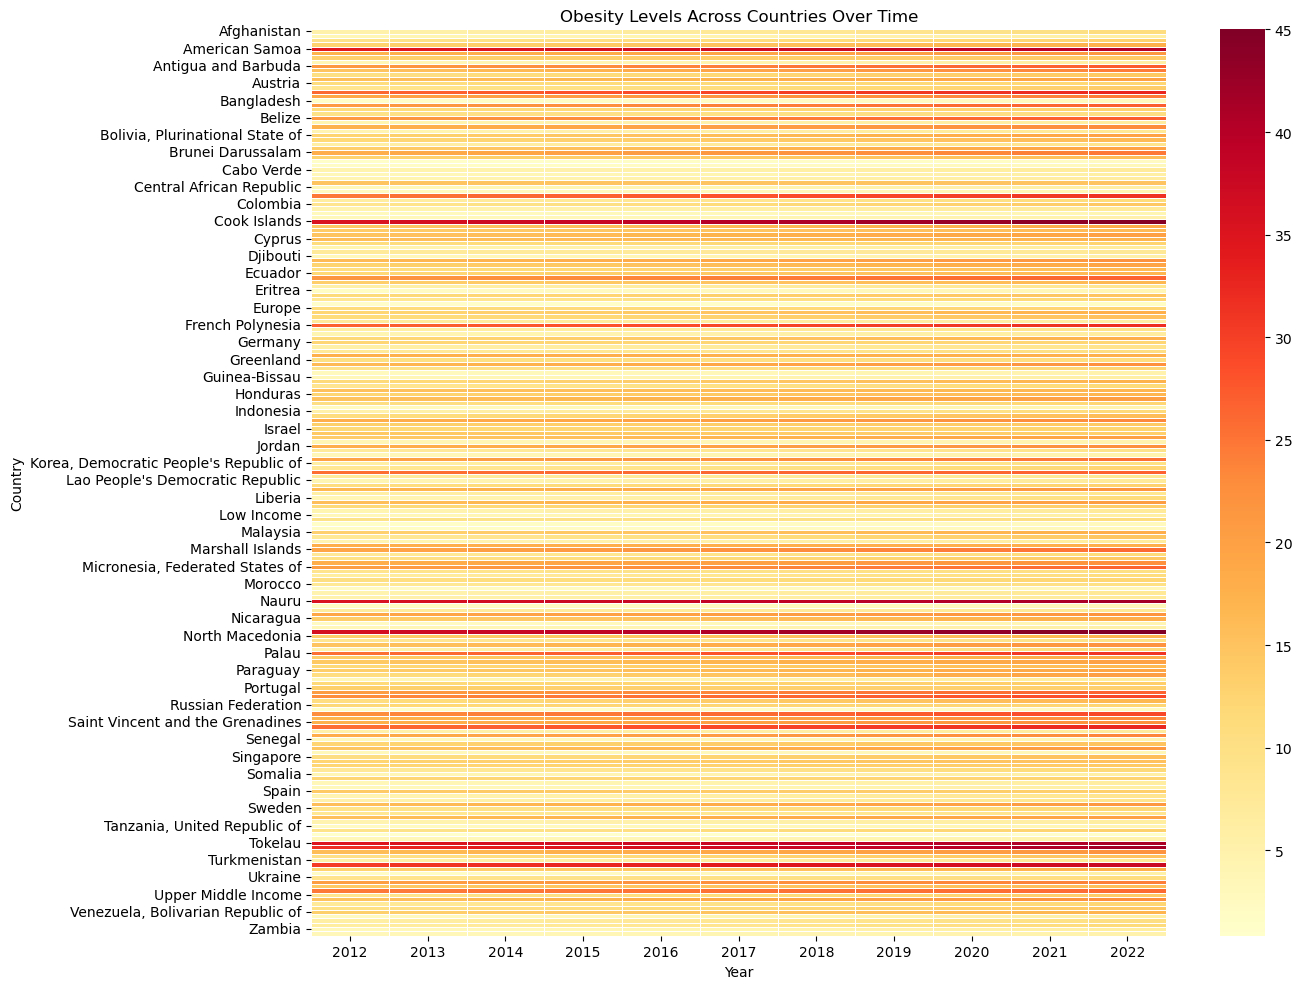

In [169]:
heatmap_data = df1_columns.pivot_table(index='Country', columns='Year', values='Mean_Estimate')
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap='YlOrRd', linewidths=0.5)
plt.title('Obesity Levels Across Countries Over Time')
plt.xlabel('Year')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


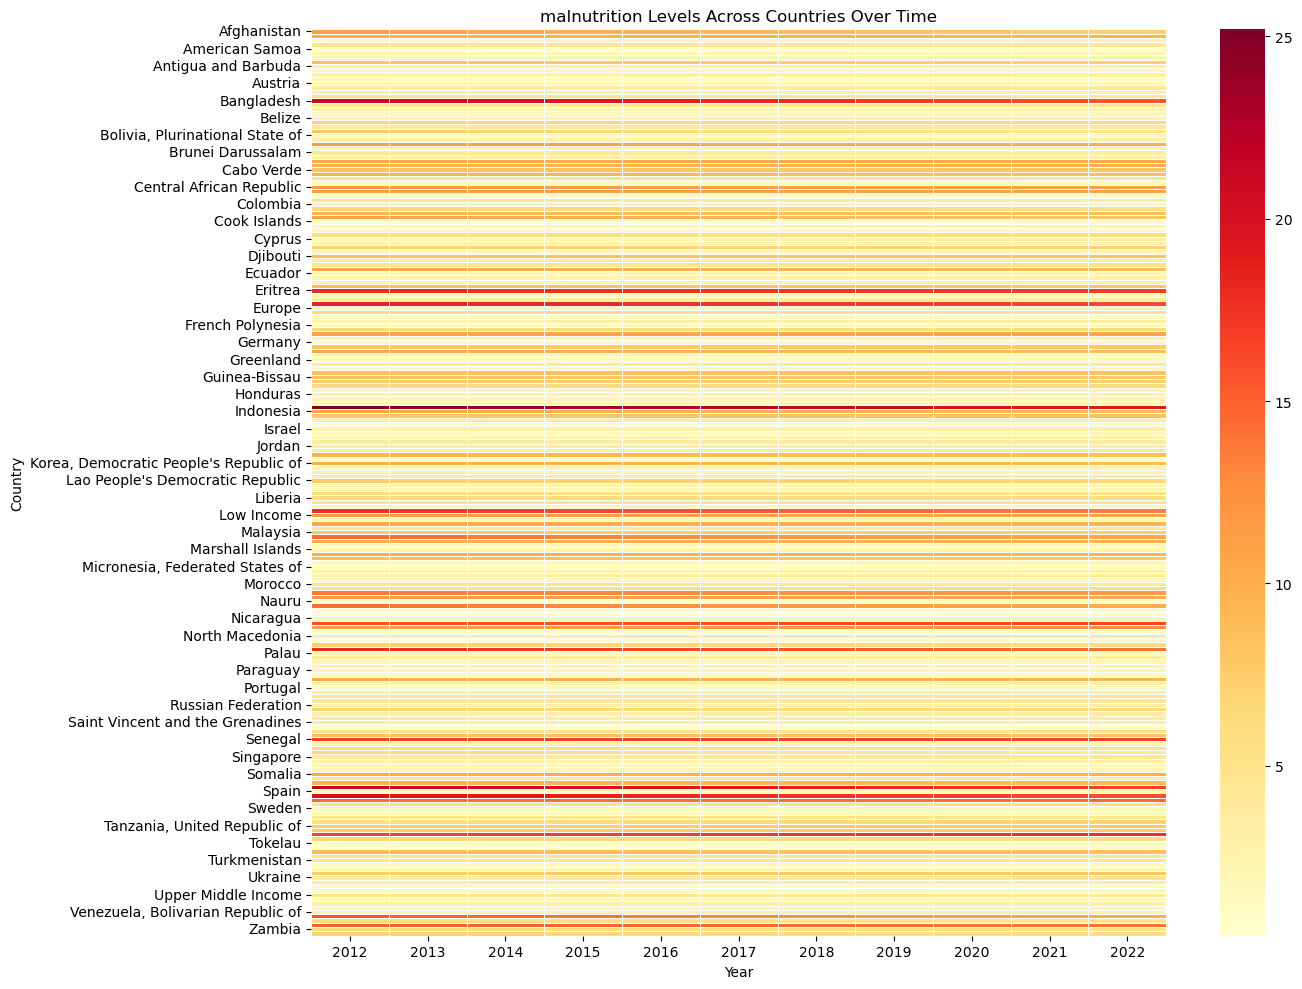

In [171]:
heatmap_data = df2_columns.pivot_table(index='Country', columns='Year', values='Mean_Estimate')
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap='YlOrRd', linewidths=0.5)
plt.title('malnutrition Levels Across Countries Over Time')
plt.xlabel('Year')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


Scatter Plot — CI Width vs Mean Estimate

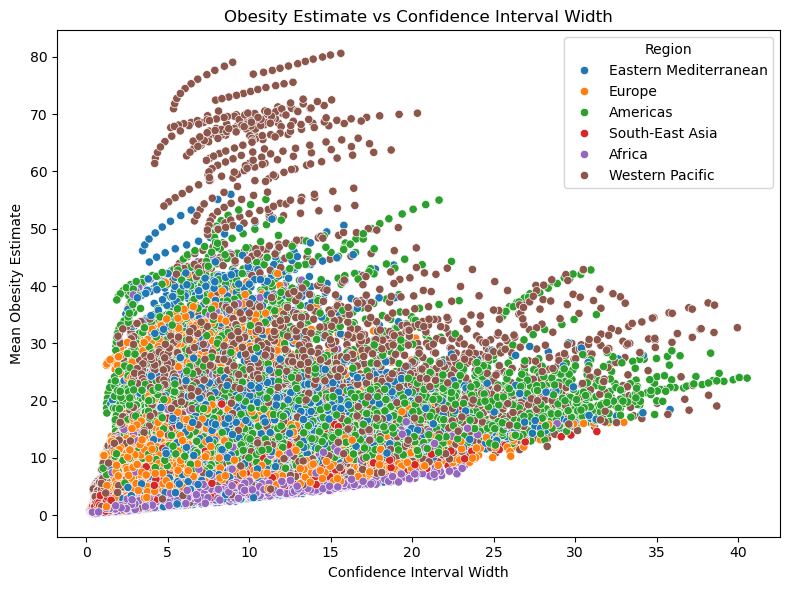

In [173]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df1_columns, x='CI_Width', y='Mean_Estimate', hue='Region')
plt.title('Obesity Estimate vs Confidence Interval Width')
plt.xlabel('Confidence Interval Width')
plt.ylabel('Mean Obesity Estimate')
plt.tight_layout()
plt.show()


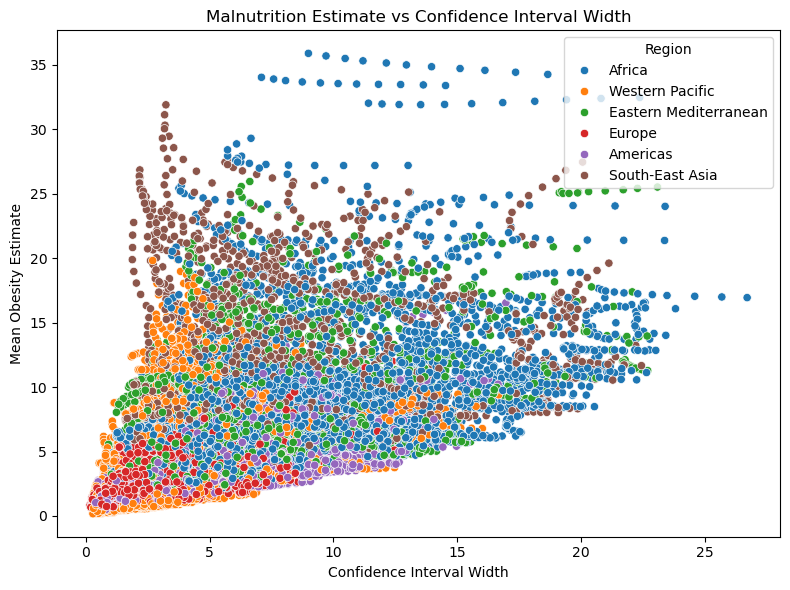

In [175]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df2_columns, x='CI_Width', y='Mean_Estimate', hue='Region')
plt.title('Malnutrition Estimate vs Confidence Interval Width')
plt.xlabel('Confidence Interval Width')
plt.ylabel('Mean Obesity Estimate')
plt.tight_layout()
plt.show()


In [177]:
!pip install pymysql

In [179]:
import pymysql

In [181]:
connection = pymysql.connect(

                            host = "localhost", # IP address of your server
                            user = "rahila",
                            password = "12345",
                            database = "nutrition"
                           
                    )
cursor = connection.cursor()

In [183]:
connection

In [185]:
# Obesity table
cursor.execute('''
CREATE TABLE IF NOT EXISTS obesity (
    Country VARCHAR(100),
    Region VARCHAR(100),
    Year INT,
    Gender VARCHAR(10),
    Age_Group VARCHAR(50),
    Mean_Estimate FLOAT,
    LowerBound FLOAT,
    UpperBound FLOAT,
    CI_Width FLOAT,
    obesity_level VARCHAR(20)
)
''')

0

In [187]:
# Malnutrition table
cursor.execute('''
CREATE TABLE IF NOT EXISTS malnutrition (
    Country VARCHAR(100),
    Region VARCHAR(100),
    Year INT,
    Gender VARCHAR(10),
    Age_Group VARCHAR(50),
    Mean_Estimate FLOAT,
    LowerBound FLOAT,
    UpperBound FLOAT,
    CI_Width FLOAT,
    malnutrition_level VARCHAR(20)
)
''')

0

In [189]:
# Insert into obesity table
for _, row in df1_columns.iterrows():
    cursor.execute('''
        INSERT INTO obesity (
            Country, Region, Year, Gender, Age_Group,
            Mean_Estimate, LowerBound, UpperBound,
            CI_Width, obesity_level
        )
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    ''', (
        row['Country'], row['Region'], int(row['Year']), row['Gender'], row['Age_Group'],
        float(row['Mean_Estimate']), float(row['LowerBound']), float(row['UpperBound']),
        float(row['CI_Width']), row['obesity_level']
    ))

In [193]:
# Insert into malnutrition table
for _, row in df2_columns.iterrows():
    cursor.execute('''
        INSERT INTO malnutrition (
            Country, Region, Year, Gender, Age_Group,
            Mean_Estimate, LowerBound, UpperBound,
            CI_Width, malnutrition_level
        )
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    ''', (
        row['Country'], row['Region'], int(row['Year']), row['Gender'], row['Age_Group'],
        float(row['Mean_Estimate']), float(row['LowerBound']), float(row['UpperBound']),
        float(row['CI_Width']), row['malnutrition_level']
    ))

# Commit changes
connection.commit()

In [195]:
cursor.close()
connection.close()